In [10]:
import pickle
import pandas as pd
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder

In [82]:
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')

In [81]:
best_model = pickle.load(open("model.pkl", 'rb'))

In [83]:
preprocessor = pickle.load(open("preprocessor.pkl", 'rb'))

In [84]:
test_df2=preprocessor.fit_transform(test_df)

In [85]:
train_df2=preprocessor.fit_transform(train_df)

In [86]:
model=best_model.fit(train_df2.drop('species', axis=1), train_df2.loc[:,'species'])

In [87]:
y_test_pred = best_model.predict(test_df2.drop('species', axis=1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       0.98      0.99      0.98       132
           2       0.99      0.98      0.98       132

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

Balanced Accuracy Score: 0.98989898989899
Precision: 0.9899732108687332
Recall: 0.98989898989899
F1-Score: 0.9898984101475062
Mean Absolute Error: 0.010101010101010102
Root Mean Squared Error: 0.10050378152592121


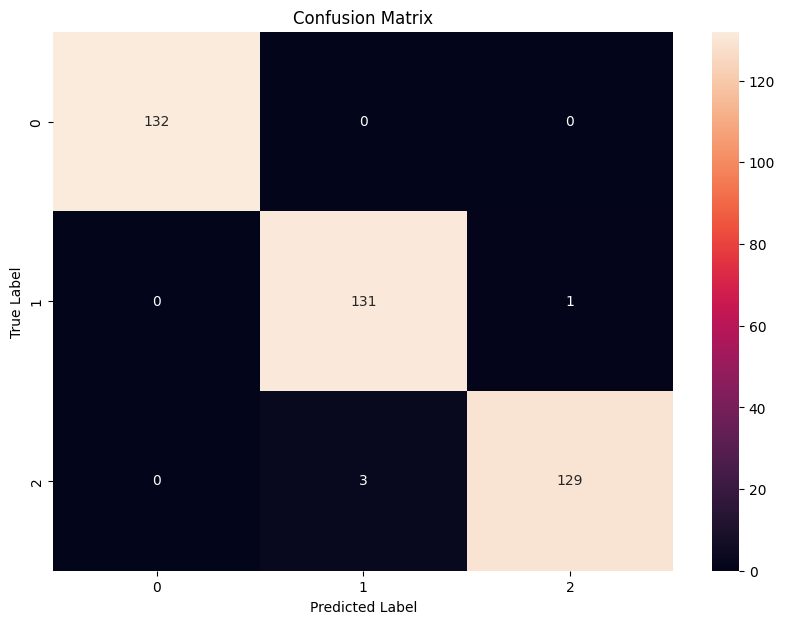

############# 1 Star Tolerance #############
Accuracy with 1 Star Tolerance: 1.0
Precision with 1 Star Tolerance: 0.9899732108687332
Recall with 1 Star Tolerance: 0.98989898989899
F1-Score with 1 Star Tolerance: 0.9898984101475062
############# 1 Star Tolerance - More #############
Accuracy with 1 Star More Tolerance: 0.9924242424242424
Precision with 1 Star More Tolerance: 0.9974750440399296
Recall with 1 Star More Tolerance: 0.9974554707379135
F1-Score with 1 Star More Tolerance: 0.9974555454484634
############# 1 Star Tolerance - Less #############
Accuracy with 1 Star Less Tolerance: 0.9974747474747475
Precision with 1 Star Less Tolerance: 0.9925750991876062
Recall with 1 Star Less Tolerance: 0.9924050632911392
F1-Score with 1 Star Less Tolerance: 0.99240440443738


In [88]:
evaluate_model(y_test_pred, test_df2.loc[:,'species'])

In [79]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, combinations

def evaluate_model(predictions, y, rounding=False):
    if rounding:
        predictions = np.round(predictions)
    
    print('Classification Report:')
    print(classification_report(y, predictions))
    
    print("Balanced Accuracy Score:", balanced_accuracy_score(y, predictions))
    
    print("Precision:", precision_score(y, predictions, average='weighted'))
    print("Recall:", recall_score(y, predictions, average='weighted'))
    print("F1-Score:", f1_score(y, predictions, average='weighted'))
    
    y_1d = np.ravel(y)  # Reshape y to be 1-dimensional
    predictions_1d = np.ravel(predictions)  # Reshape predictions to be 1-dimensional
    
    # Mean Absolute Error (MAE)
    print("Mean Absolute Error:", mean_absolute_error(y_1d, predictions_1d))
    
    # Root Mean Squared Error (RMSE)
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_1d, predictions_1d)))
    
    cm = confusion_matrix(y, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    print("############# 1 Star Tolerance #############")
    
    print("Accuracy with 1 Star Tolerance:", np.mean(np.abs(y_1d - predictions_1d) <= 1))
    print("Precision with 1 Star Tolerance:", precision_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=np.abs(y_1d - predictions_1d) <= 1))
    print("Recall with 1 Star Tolerance:", recall_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=np.abs(y_1d - predictions_1d) <= 1))
    print("F1-Score with 1 Star Tolerance:", f1_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=np.abs(y_1d - predictions_1d) <= 1))
    
    
    diff = predictions_1d - y_1d
    
    print("############# 1 Star Tolerance - More #############")
    diff_more = (diff >= 0) & (diff <= 1)
    print("Accuracy with 1 Star More Tolerance:", np.mean(diff_more))
    print("Precision with 1 Star More Tolerance:", precision_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=diff_more))
    print("Recall with 1 Star More Tolerance:", recall_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=diff_more))
    print("F1-Score with 1 Star More Tolerance:", f1_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=diff_more))
    
    print("############# 1 Star Tolerance - Less #############")
    diff_less = (diff <= 0) & (diff >= -1)
    print("Accuracy with 1 Star Less Tolerance:", np.mean(diff_less))
    print("Precision with 1 Star Less Tolerance:", precision_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=diff_less))
    print("Recall with 1 Star Less Tolerance:", recall_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=diff_less))
    print("F1-Score with 1 Star Less Tolerance:", f1_score(y_1d, predictions_1d, average='weighted', zero_division=1, pos_label=1, sample_weight=diff_less))
    